In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import Parallel, delayed

from os import listdir
from os.path import isfile, join

In [2]:
df = pd.read_csv('historical_bar_daily.csv')

mypath = 'pytrend/ethereum/'
onlyfiles = [mypath + f for f in listdir(mypath) if isfile(join(mypath, f))]
trend_df = pd.concat([pd.read_csv(o) for o in onlyfiles])
trend_df.sort_values('date', inplace=True)

In [43]:
trend_df = trend_df[trend_df['date'].apply(lambda x: str(x)[:4] >= '2018')].copy()

In [21]:
for l in [7, 14, 21, 30, 60, 90]:
    trend_df[f'scale_{l}_ma'] = trend_df['scale'].rolling(l).mean()

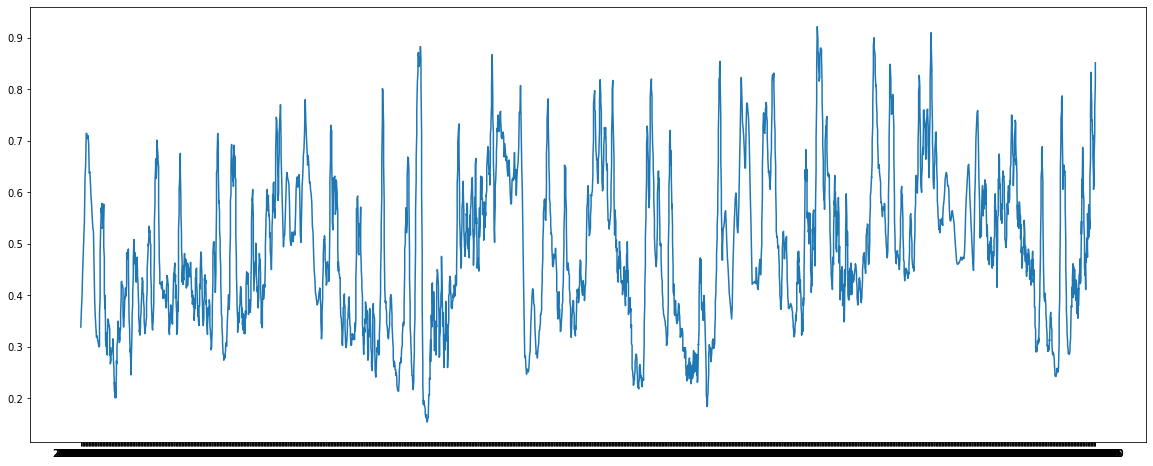

In [44]:
fig, ax = plt.subplots(figsize=(20, 8))
plt.plot(trend_df['date'], trend_df['scale_7_ma'])

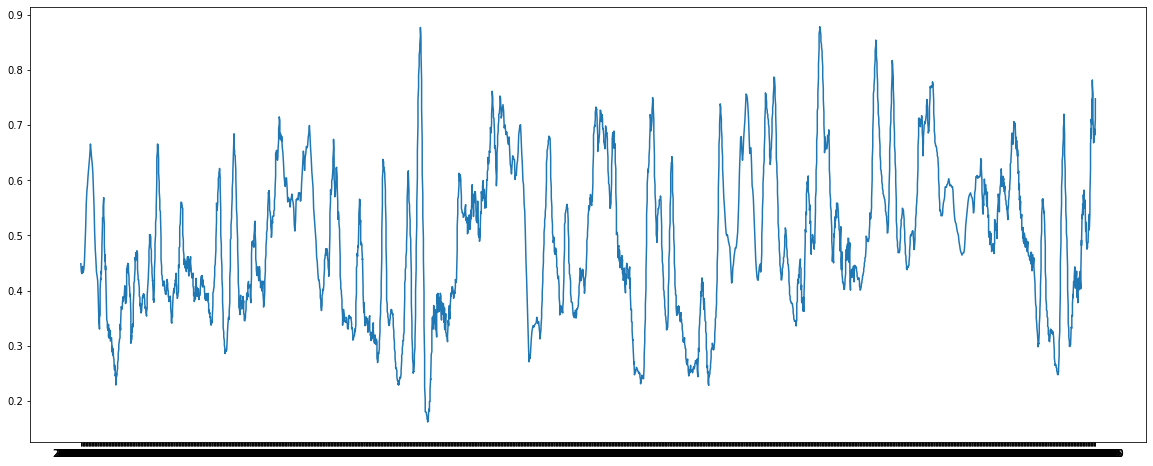

In [45]:
fig, ax = plt.subplots(figsize=(20, 8))
plt.plot(trend_df['date'], trend_df['scale_14_ma'])

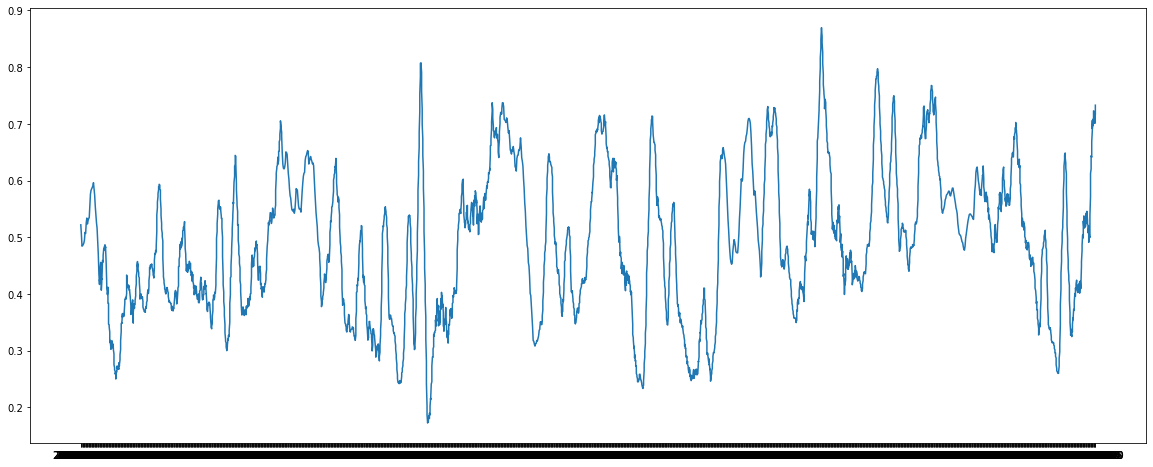

In [47]:
fig, ax = plt.subplots(figsize=(20, 8))
plt.plot(trend_df['date'], trend_df['scale_21_ma'])

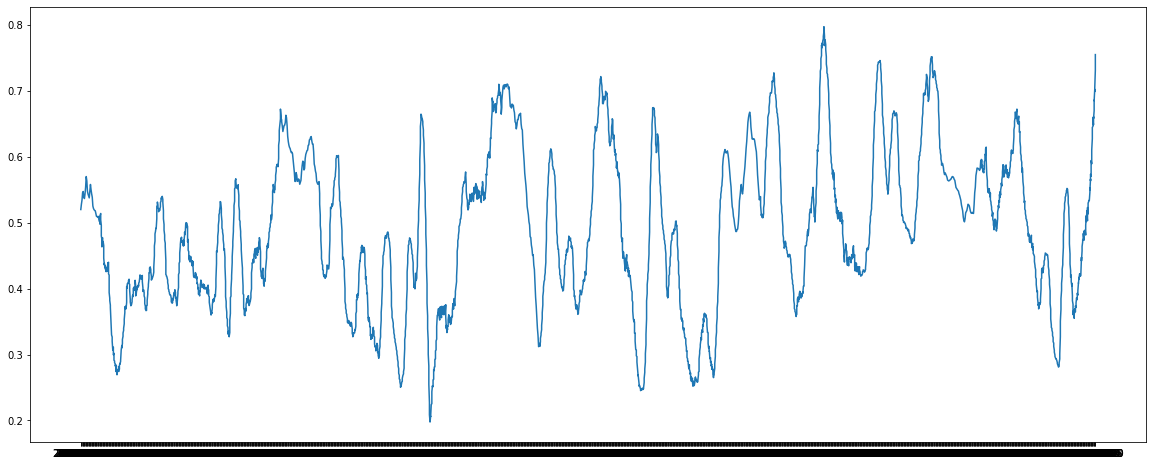

In [46]:
fig, ax = plt.subplots(figsize=(20, 8))
plt.plot(trend_df['date'], trend_df['scale_30_ma'])

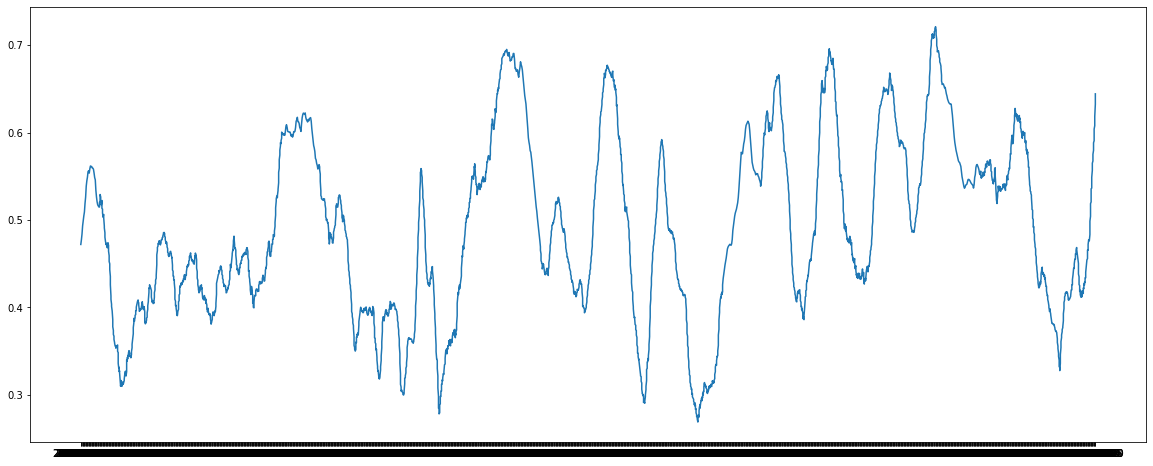

In [48]:
fig, ax = plt.subplots(figsize=(20, 8))
plt.plot(trend_df['date'], trend_df['scale_60_ma'])

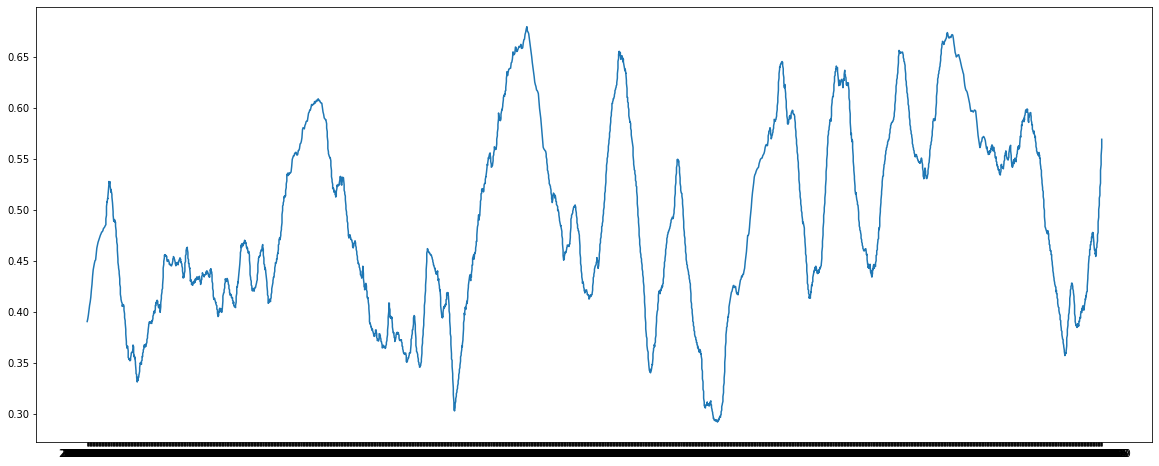

In [49]:
fig, ax = plt.subplots(figsize=(20, 8))
plt.plot(trend_df['date'], trend_df['scale_90_ma'])

In [4]:
for s in df.symbol.unique():
    globals()[s] = df[df['symbol'] == s].copy()
    globals()[s].drop(['ab', 'bb', 'expiry', 'right', 'strike', 'instrument'], axis=1, inplace=True)
    for f in globals()[s].columns:
        if f not in ['symbol', 't']:
            globals()[s][f"{f}_lag1"] = globals()[s][f].shift(1)
            
    globals()[s]['date'] = globals()[s]['t'].apply(lambda x: str(x)[:10])
    globals()[s]['return'] = globals()[s]['c'].pct_change(1)
    globals()[s].drop(['a', 'b', 'c', 'h', 'l', 'm', 'o', 'symbol', 't', 'v'], axis=1, inplace=True)

In [5]:
df.symbol.unique()

array(['BTCUSD', 'BNBUSDT', 'ETHUSD', 'LTCUSD', 'BCHUSD', 'XRPUSD',
       'ADAUSDT', 'XLMUSDT', 'TRXUSDT', 'ETCUSDT', 'VETUSDT', 'EOSUSDC',
       'LINKUSDT', 'WAVESUSDT', 'BTTUSDT', 'ZILUSDT', 'BATUSDT',
       'XMRUSDT', 'ZECUSDT', 'NEOUSDC', 'DASHUSDT', 'THETAUSDT',
       'ENJUSDT', 'MATICUSDT', 'ATOMUSDT', 'TFUELUSDT', 'FTMUSDT',
       'ALGOUSDT', 'DOGEUSDT', 'XTZUSDT', 'HBARUSDT', 'STXUSDT', 'BTCJPY',
       'BTCKRW', 'FTTUSDT'], dtype=object)

In [6]:
ETHUSD

,a_lag1,b_lag1,c_lag1,h_lag1,l_lag1,m_lag1,o_lag1,v_lag1,date,return
408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-11,NaN
412,876.27,876.27,876.270,882.200,781.660,876.270,781.660,95324.89711,2018-02-12,-0.027857
416,851.86,851.86,851.860,911.200,800.000,851.860,877.000,214844.48763,2018-02-13,-0.044139
420,814.26,814.26,814.260,857.000,768.280,814.260,851.150,189323.40800,2018-02-14,0.064770
424,867.00,867.00,867.000,877.560,807.460,867.000,808.580,143586.93121,2018-02-15,-0.027785
...,...,...,...,...,...,...,...,...,...,...
25323,627.63,625.45,626.540,643.375,577.500,626.540,611.275,175559.00000,2020-12-28,0.016926
25358,637.69,636.60,637.145,652.540,586.160,637.145,626.540,155097.00000,2020-12-29,0.073751
25393,684.46,683.81,684.135,714.685,588.845,684.135,637.145,163395.00000,2020-12-30,0.066990
25428,731.40,728.53,729.965,769.345,616.205,729.965,684.135,139436.00000,2020-12-31,0.001973


In [26]:
['scale', 'scale_7_ma', 'scale_14_ma', 'scale_21_ma', 'scale_30_ma', 'scale_60_ma', 'scale_90_ma']

['ethereum_unscaled',
 'scale',
 'scale_7_ma',
 'scale_14_ma',
 'scale_21_ma',
 'scale_30_ma',
 'scale_60_ma',
 'scale_90_ma']

In [29]:
ETHUSD = pd.merge(ETHUSD, trend_df[['date', 'scale', 'scale_7_ma', 'scale_14_ma', 'scale_21_ma', 'scale_30_ma', 'scale_60_ma', 'scale_90_ma']], on='date', how='left')

<AxesSubplot:>

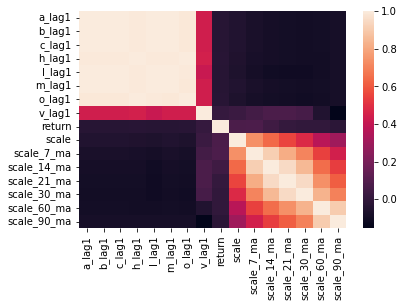

In [34]:
sns.heatmap(ETHUSD.corr())

In [35]:
ETHUSD

,a_lag1,b_lag1,c_lag1,h_lag1,l_lag1,m_lag1,o_lag1,v_lag1,date,return,scale,scale_7_ma,scale_14_ma,scale_21_ma,scale_30_ma,scale_60_ma,scale_90_ma
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-11,NaN,0.17,0.341429,0.437143,0.481429,0.429333,0.475500,0.515111
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-11,NaN,0.37,0.312857,0.445000,0.483333,0.430667,0.475167,0.512667
2,876.27,876.27,876.270,882.200,781.660,876.270,781.660,95324.89711,2018-02-12,-0.027857,0.19,0.301429,0.398571,0.458571,0.425667,0.472167,0.507556
3,876.27,876.27,876.270,882.200,781.660,876.270,781.660,95324.89711,2018-02-12,-0.027857,0.41,0.327143,0.400000,0.455714,0.428667,0.473333,0.506889
4,851.86,851.86,851.860,911.200,800.000,851.860,877.000,214844.48763,2018-02-13,-0.044139,0.21,0.287143,0.347143,0.418095,0.426667,0.470333,0.498111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1951,627.63,625.45,626.540,643.375,577.500,626.540,611.275,175559.00000,2020-12-28,0.016926,1.00,0.645714,0.616429,0.533333,0.533333,0.546333,0.454222
1952,637.69,636.60,637.145,652.540,586.160,637.145,626.540,155097.00000,2020-12-29,0.073751,0.85,0.701429,0.650000,0.551429,0.541000,0.556000,0.459000
1953,684.46,683.81,684.135,714.685,588.845,684.135,637.145,163395.00000,2020-12-30,0.066990,0.96,0.771429,0.677857,0.578095,0.550667,0.567833,0.467444
1954,731.40,728.53,729.965,769.345,616.205,729.965,684.135,139436.00000,2020-12-31,0.001973,0.89,0.822857,0.679286,0.602857,0.558000,0.577500,0.474778
